const      -417.174321
Germany       2.954368
Russia        2.272557
France        6.945081
Portugal     -6.390294
dtype: float64


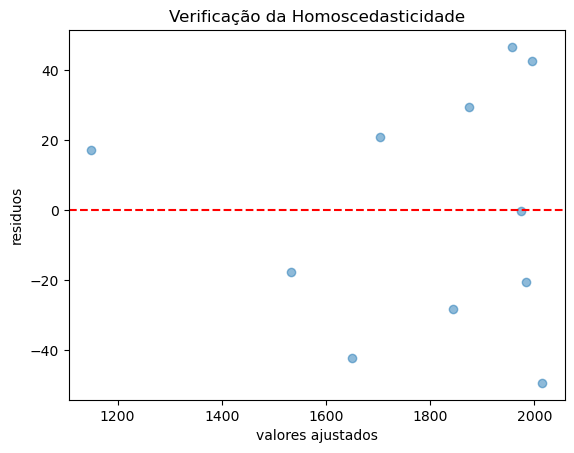

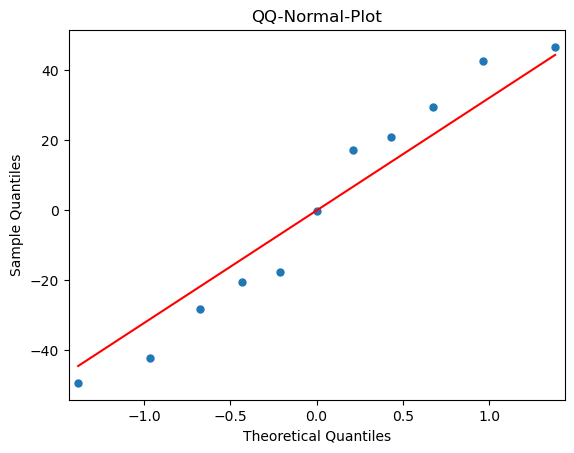

Shapiro p-value:
0.5272980332374573
valor da estatística DW: 1.5765642728739078
  variaveis         VIF
0   Germany  328.558342
1    Russia  138.679515
2    France   56.656309
3  Portugal   40.490640
      year country  coal_co2
9372  2000  Europe  1965.518
9374  2002  Europe  1974.031
9376  2004  Europe  2004.665
9378  2006  Europe  2037.609
9380  2008  Europe  1964.492
9382  2010  Europe  1815.784
9384  2012  Europe  1904.943
9386  2014  Europe  1724.987
9388  2016  Europe  1607.415
9390  2018  Europe  1516.126
9392  2020  Europe  1166.725


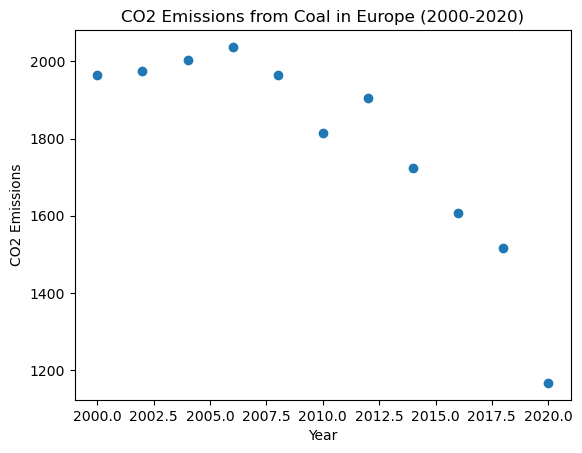

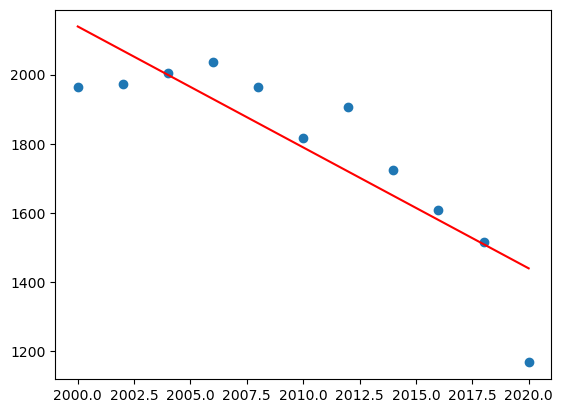

Valor estimado: 1614.251
Valor real: [1702.246]


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
dados = pd.read_csv("CO_data.csv" , delimiter=",")
dados.columns = ["country","year","population","gdp","cement_co2","co2","coal_co2","energy_per_capita","energy_per_gdp","flaring_co2","gas_co2","methane","nitrous_oxide","oil_co2"]

#Ex 2
#a) Como se trata de uma regressão linear múltipla (existem várias variáveis independentes), o modelo é o seguinte: Y = β0 + β1X1 + β2X2 + β3X3 + β4X4 + ϵ
paises = {'Germany','Russia','France','Portugal','Europe'}
dados_paises = dados.loc[(dados['year'] > 2000) & (dados['country'].isin(paises))  & (dados['year'] % 2 == 0),['year','country','coal_co2']]
tabela = dados_paises.pivot(index='year', columns='country', values='coal_co2')

X = tabela[['Germany', 'Russia', 'France', 'Portugal']]
Y = tabela['Europe']
Xc = sm.add_constant(X)
modelo = sm.OLS(Y, Xc)
res = modelo.fit()
print(res.params)

#b)

#Homocedasticidade:

val_ajust=res.fittedvalues
residuos=res.resid
plt.scatter(val_ajust , residuos , alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Verificação da Homoscedasticidade')
plt.xlabel('valores ajustados')
plt.ylabel('residuos')
plt.show()

#Normalidade dos resíduos

sm.qqplot(residuos , line='s', markersize=5)
plt.title('QQ-Normal-Plot')
plt.show()
st,pv= stats.shapiro(residuos)
print('Shapiro p-value:')
print(pv)

#Independência dos resíduos
from statsmodels.stats.stattools import durbin_watson
durbinWatson = durbin_watson(residuos)
print('valor da estatística DW:',durbinWatson)

#c)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_res = pd.DataFrame()
vif_res["variaveis"] = X.columns
vif_res["VIF"]=[variance_inflation_factor(X.values , i)
 for i in range(len(X.columns))]
print(vif_res)

#d)

#e)
dados_europa = dados.loc[(dados['year'] > 2000) & (dados['country'] == 'Europe') & (dados['year'] % 2 == 0),['year','country','coal_co2']]
print(dados_europa)
plt.scatter(dados_europa['year'], dados_europa['coal_co2'])
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title('Emissões de carvão na Europa (2001-2020)')
plt.show()

xc = sm.add_constant(dados_europa['year'])
y = dados_europa['coal_co2']
model = sm.OLS(y, xc)
resultados = model.fit()
y_pred = resultados.predict(xc)

plt.scatter(dados_europa['year'], dados_europa['coal_co2'])
plt.plot(dados_europa['year'], y_pred, color='red')
plt.show()

xp = np.array([2015, 2017]) 
xp = sm.add_constant(xp)
yp = resultados.predict(xp)

real_2015 = dados.loc[(dados['year'] == 2015) & (dados['country'] == 'Europe'),['coal_co2']]

print("Valor estimado:",yp[0].round(3))
print("Valor real:", real_2015['coal_co2'].values)